# Bimodularity Directedness Benchmarking Analysis

This notebook provides a benchmarking analysis of bimodularity through directedness strength variation upon different datasets and parameter ranges.

## Overview
- **Toy Example**: Synthetic data analysis with parameter optimization.
- **C. Elegans**: Analysis of neural connectivity data (chemical and electrical gap junctions)
- **Brain**: Brain network analysis (TBD)

## Goals
1. Evaluate directedness influence on bicommunities 
2. Determine critical values for the directedness emphasis parameter where bicommunity reciprocity changes significatively
3. Dectect potential optimization for N, K through bicommunity reciprocity analysis

## 1. Imports and Config

Import all necessary libraries for bimodularity analysis, data manipulation, and visualization.

In [1]:
import sys

# setting path
sys.path.append('../')

# Standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Bimodularity specific imports
import Bimodularity_Directedness_Benchmark as bimod_bench
import Bimodularity_Directedness_Benchmark_Plots as bimod_bench_plt
import bimod_plots
import dgsp
import graph_examples as dgsp_graphs
# Additional utilities

# Set random seed for reproducibility

seed = 28
np.random.seed(seed)


print("All libraries imported successfully!")

All libraries imported successfully!


In [2]:
#TODO: Configure plotting

## 2. Toy Example Analysis

Synthetic data analysis to validate benchmarking algorithms and parameter optimization strategies.

### 2.1 Loading of Data and Setting Parameters

Generate synthetic network data and set initial parameters for analysis. Networks are based on 4 communities that are connected as listed under examples

Model :  $A = \frac{A_s^{\gamma}}{A_s^{\gamma} + \left(A_s^\top\right)^{\gamma}} $, where $A_s = (1 + \alpha)A_{init} + A_{init}^\top$ 

Examples : 
-   A_assym  directed graph used 
-   A_sym undirected graph for control
-   A_hyp1 undirected graph combined with a much stronger directed graph 
-   A_hyp2 undirected graph combined with a stronger directed graph
-   A_hyp3 undirected graph combined with a similar directed graph
-   A_hyp4 undirected graph combined with a weaker directed graph
-   A_hyp5 undirected graph combined with a much weaker directed graph


In [2]:
#TODO: Generate directed graph 
n_per_com = 40
density_value = .4
eig_id = 0

write_s = False
for_overleaf = True

A_assym = dgsp_graphs.toy_n_communities(n_per_com, 4, com_density=density_value,
                                      connect_density=[density_value, density_value, 0, 
                                                       0, density_value, density_value],
                                      #connect_density=[1, 1, 0, 1, 1, 1],
                                      connect_out_prob=[1, 0, 0.5, 0.5, 1, 0],
                                      seed= seed)
A_sym =  ((A_assym + A_assym.T) >0).astype(int)  # make it undirected

A_hyp1 = 0.9 * A_assym + 0.1 * A_sym
A_hyp2 = 0.7 * A_assym + 0.3 * A_sym
A_hyp3 = 0.5 * A_assym + 0.5 * A_sym  
A_hyp4 = 0.3 * A_assym + 0.7 * A_sym
A_hyp5 = 0.1 * A_assym + 0.9 * A_sym
As = { "fully directed graph": A_assym ,  "fully undirected graph" : A_sym, 
      "a graph with very strong directedness" :  A_hyp1 , "a graph with strong directedness": A_hyp2 , 
      "a graph with balanced directedness":A_hyp3,  "a graph with weak directedness":  A_hyp4 ,
      "a graph with very weak directedness": A_hyp5 }



### 2.2 Asymmetry Variation and Relative Community Prediction

Analyze how asymmetry in the synthetic network affects bicommunity reciprocity

c:\Users\chris\anaconda3\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\chris\anaconda3\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\chris\anaconda3\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\chris\anaconda3\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\chris\anaconda3\Lib\site-packages\s

Counts of surviving communities at tolerance 0.37
[[  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   1   0   0   0   0   1   0   0]
 [ 65 611 586 605  36  34   7   0   0]
 [ 62  56  51  23  24  15  19   2   0]
 [377 361 306 107 168 268 119 194   0]
 [222 222 226 174 198 113 167  82   0]
 [116 131 133 120 121 117 105  95   0]
 [100 100 100 100 100 100 100 100   0]]


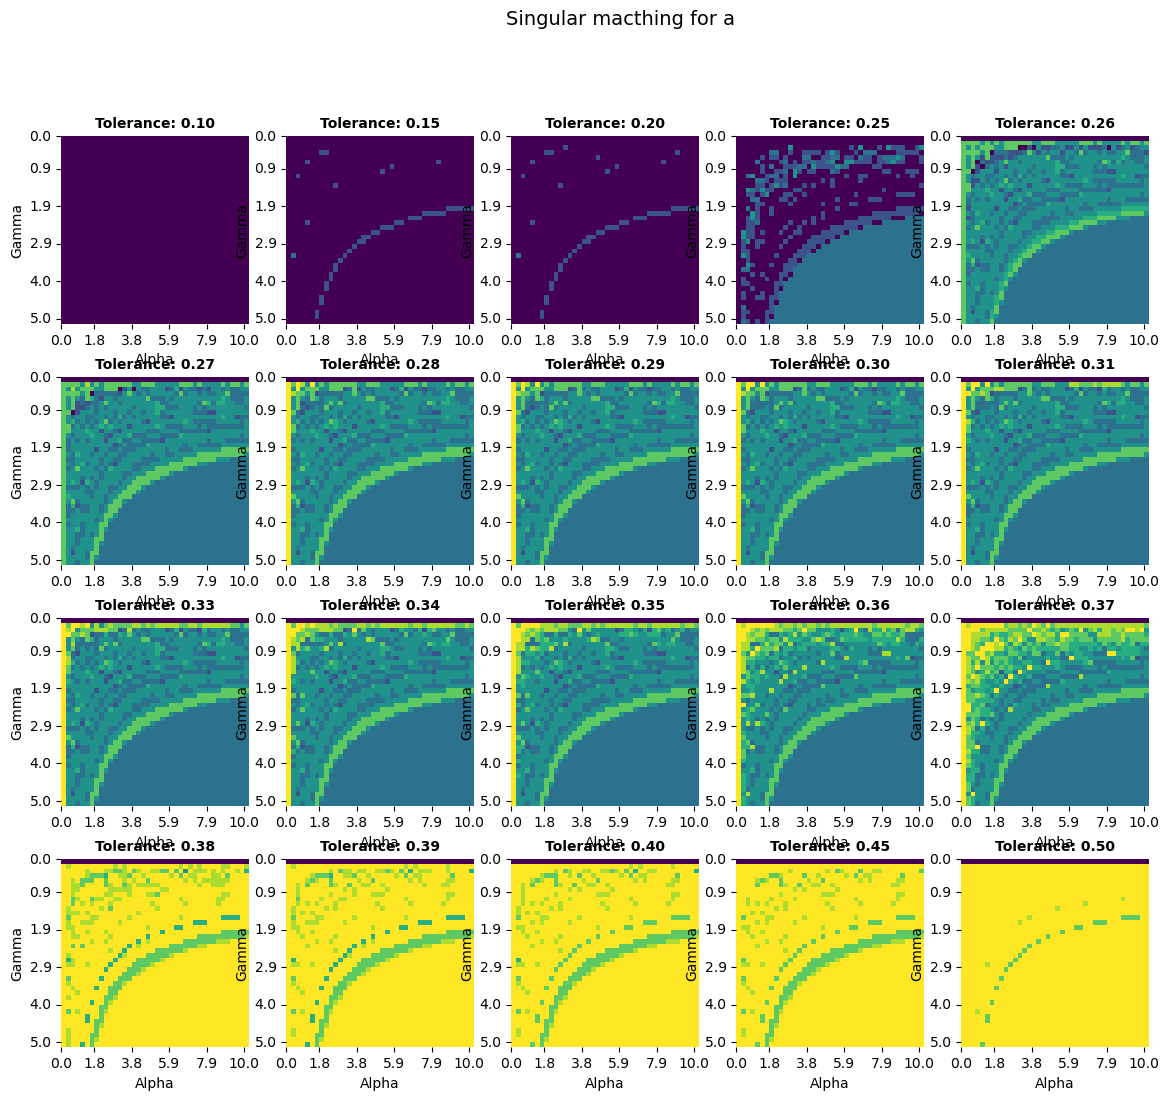

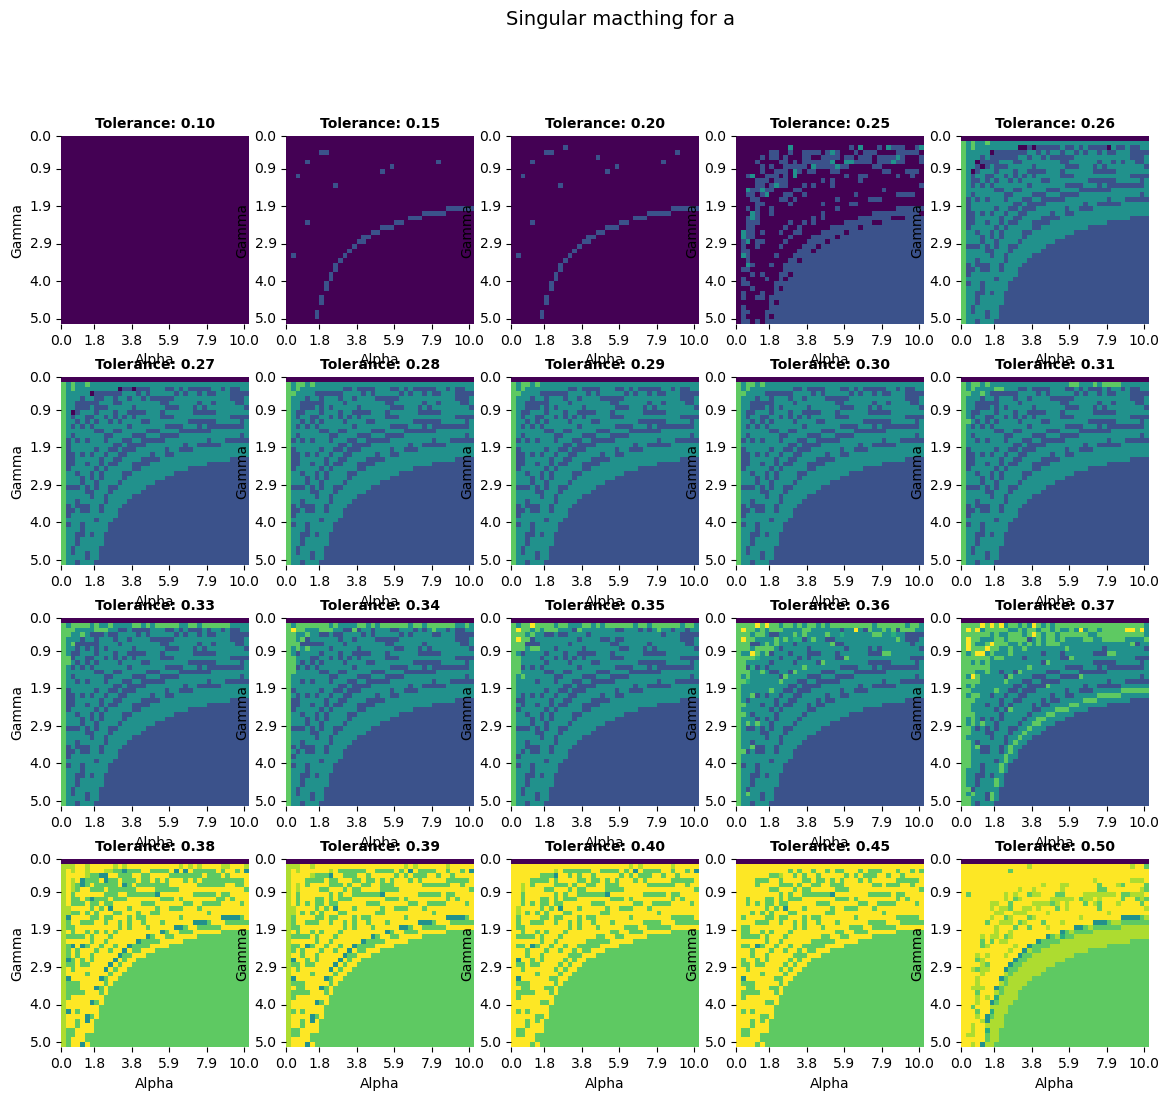

In [5]:
gammas =  np.linspace(0, 5, 40)
alphas =  np.linspace(0, 10, 40)
n_kmeans = 8
vector_id_max = 2
n_tolerance = 20  
tolerance_range = np.concatenate ( ([0.10, 0.15, 0.20], np.linspace(0.25, 0.4, n_tolerance - 5), [0.45, 0.50]) )

communities = bimod_bench_plt.get_communities(A_assym + A_assym.T, A_assym, alphas, gammas, n_kmeans, vector_id_max)
heatmaps_s, heatmaps_o =  bimod_bench_plt.alpha_gamma_heatmaps(communities, tolerance_range, len(gammas) , len(alphas))

bimod_bench_plt.plot_heatmaps(alphas, gammas, n_kmeans, tolerance_range, heatmaps_s, f"Singular macthing for a ")
bimod_bench_plt.plot_heatmaps(alphas, gammas, n_kmeans, tolerance_range, heatmaps_o, f"Singular macthing for a ")
bimod_bench_plt.show_repartition(communities, 0.37, alphas, gammas, n_kmeans)

In [1]:
gammas =  np.linspace(0, 2.5, 40)
alphas =  np.linspace(0, 5, 40)
n_kmeans = 8
vector_id_max = 2
n_tolerance = 20  
tolerance_range = np.concatenate ( ([0.10, 0.15, 0.20], np.linspace(0.25, 0.4, n_tolerance - 5), [0.45, 0.50]) )

communities = bimod_bench_plt.get_communities(A_assym + A_assym.T, A_assym, alphas, gammas, n_kmeans, vector_id_max)
heatmaps_s, heatmaps_o =  bimod_bench_plt.alpha_gamma_heatmaps(communities, tolerance_range, len(gammas) , len(alphas))

bimod_bench_plt.plot_heatmaps(alphas, gammas, n_kmeans, tolerance_range, heatmaps_s, f"Singular macthing for a ")
bimod_bench_plt.plot_heatmaps(alphas, gammas, n_kmeans, tolerance_range, heatmaps_o, f"Singular macthing for a ")


NameError: name 'np' is not defined

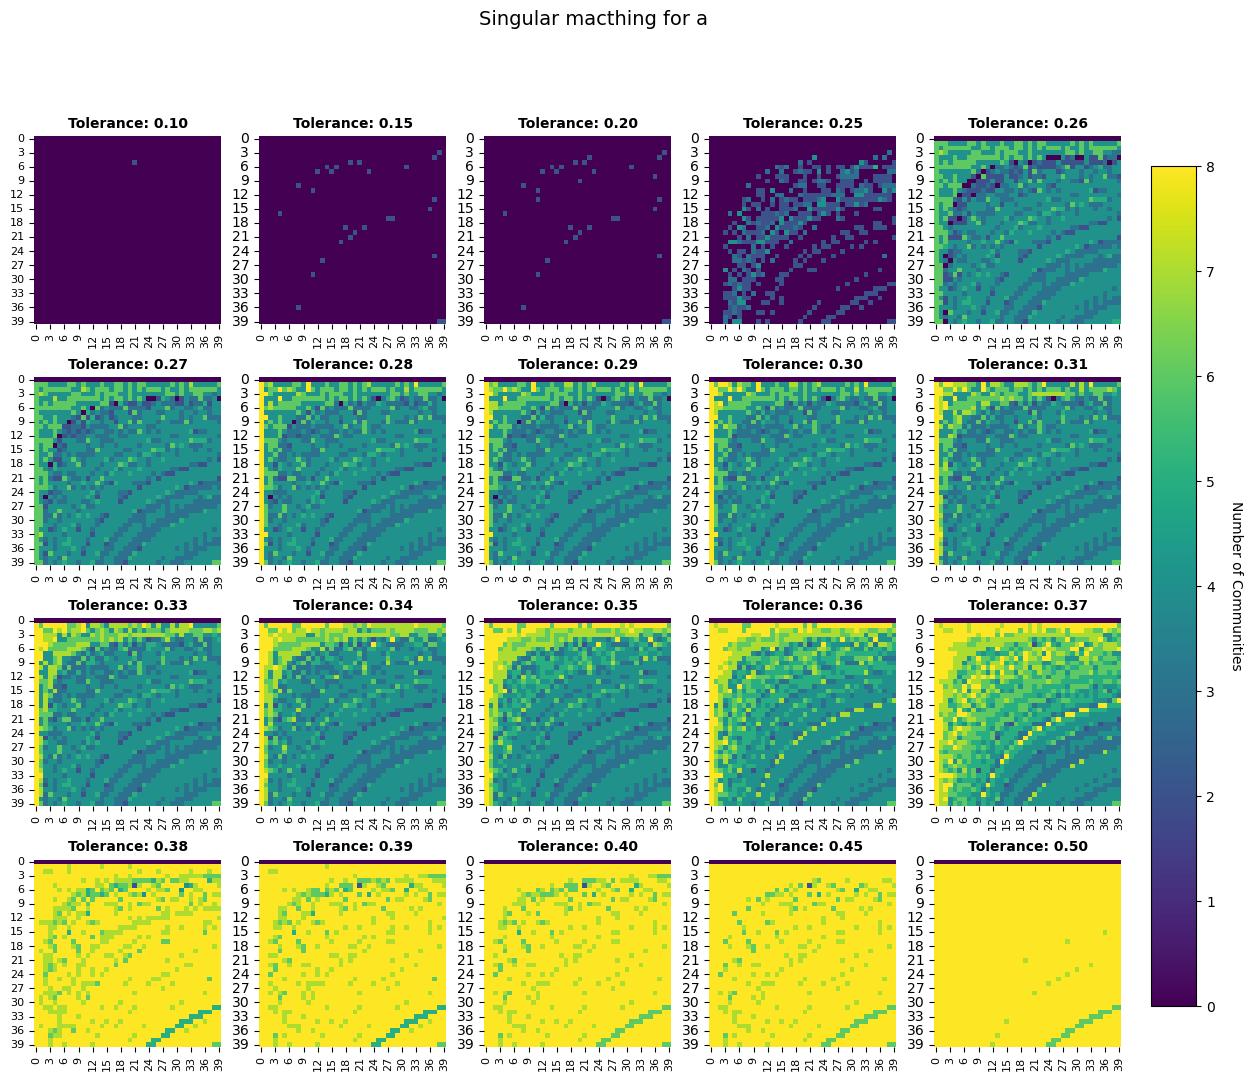

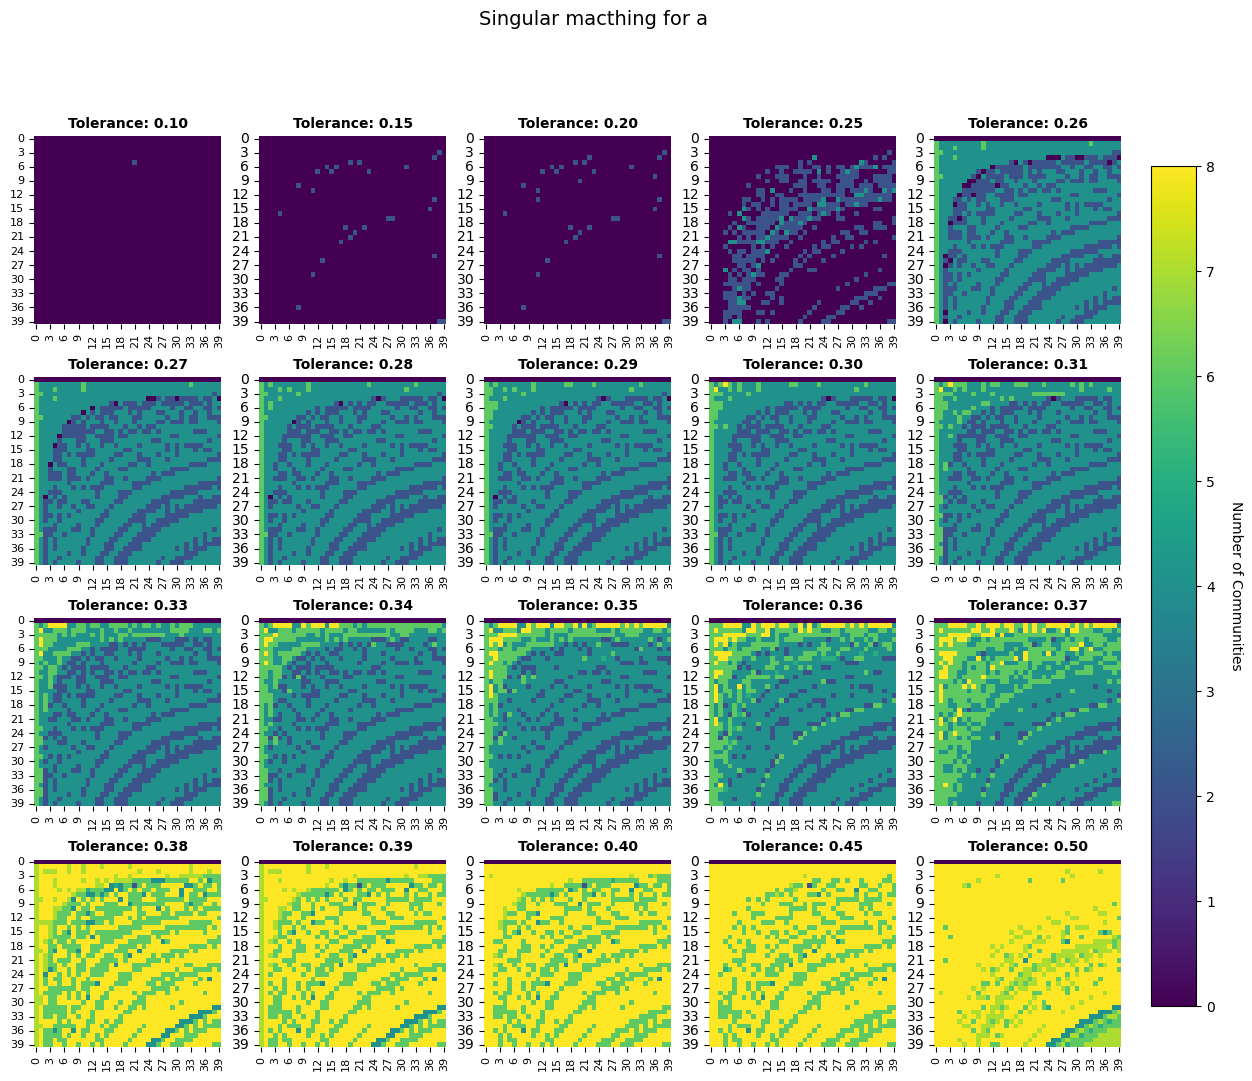

In [ ]:
gammas =  np.linspace(0, 2.5, 40)
alphas =  np.linspace(0, 5, 40)
n_kmeans = 8
vector_id_max = 2
n_tolerance = 20  
tolerance_range = np.concatenate ( ([0.10, 0.15, 0.20], np.linspace(0.25, 0.4, n_tolerance - 5), [0.45, 0.50]) )

communities = bimod_bench_plt.get_communities(A_assym + A_assym.T, A_assym, alphas, gammas, n_kmeans, vector_id_max)
heatmaps_s, heatmaps_o =  bimod_bench_plt.alpha_gamma_heatmaps(communities, tolerance_range, len(gammas) , len(alphas))

bimod_bench_plt.plot_heatmaps(alphas, gammas, n_kmeans, tolerance_range, heatmaps_s, f"Singular macthing for a ")
bimod_bench_plt.plot_heatmaps(alphas, gammas, n_kmeans, tolerance_range, heatmaps_o, f"Singular macthing for a ")


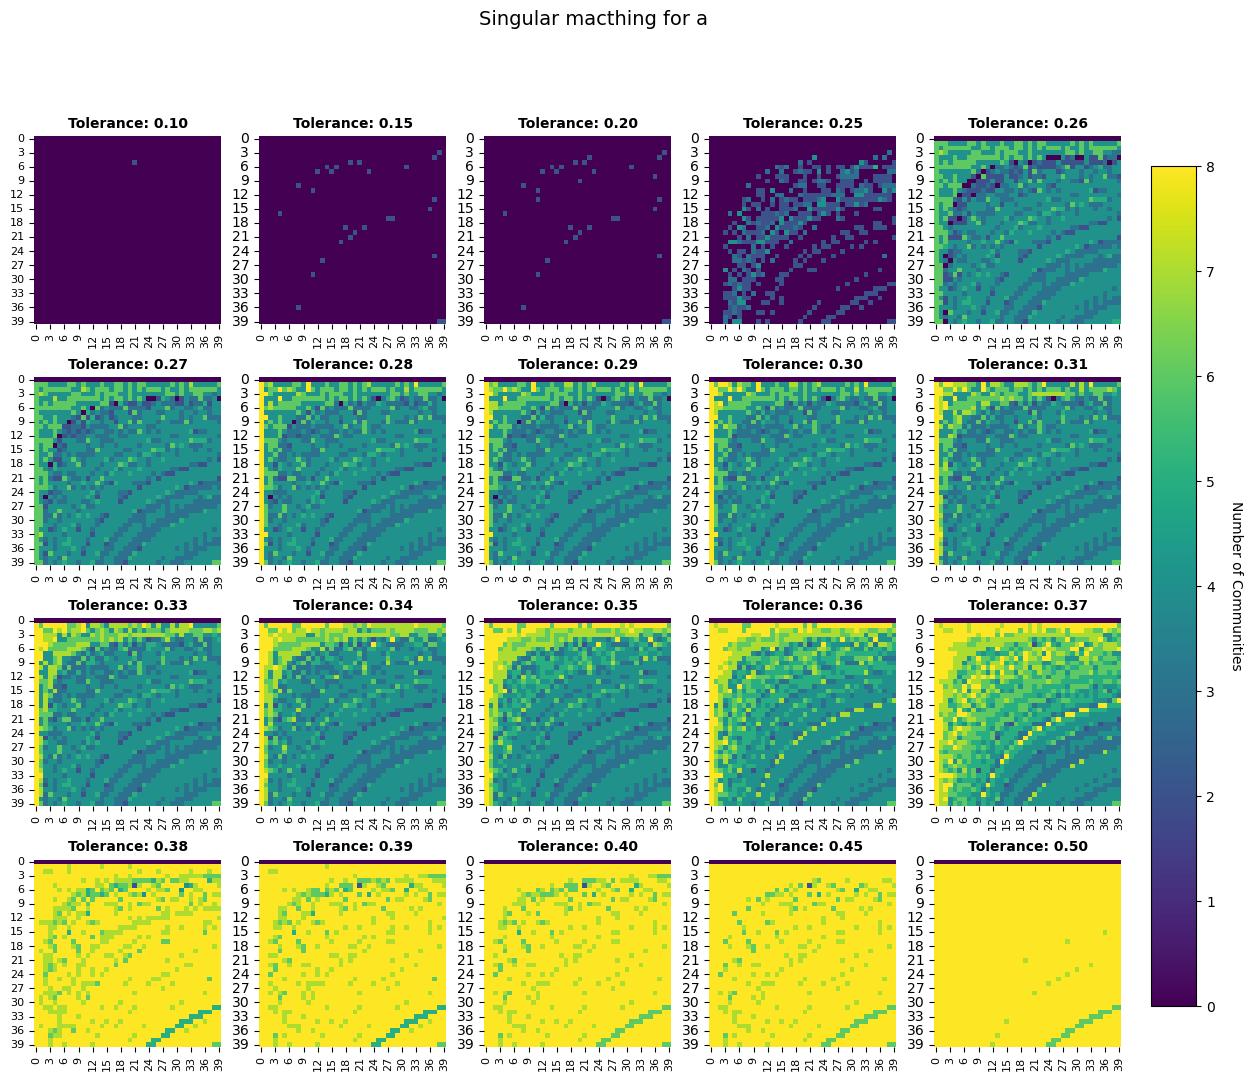

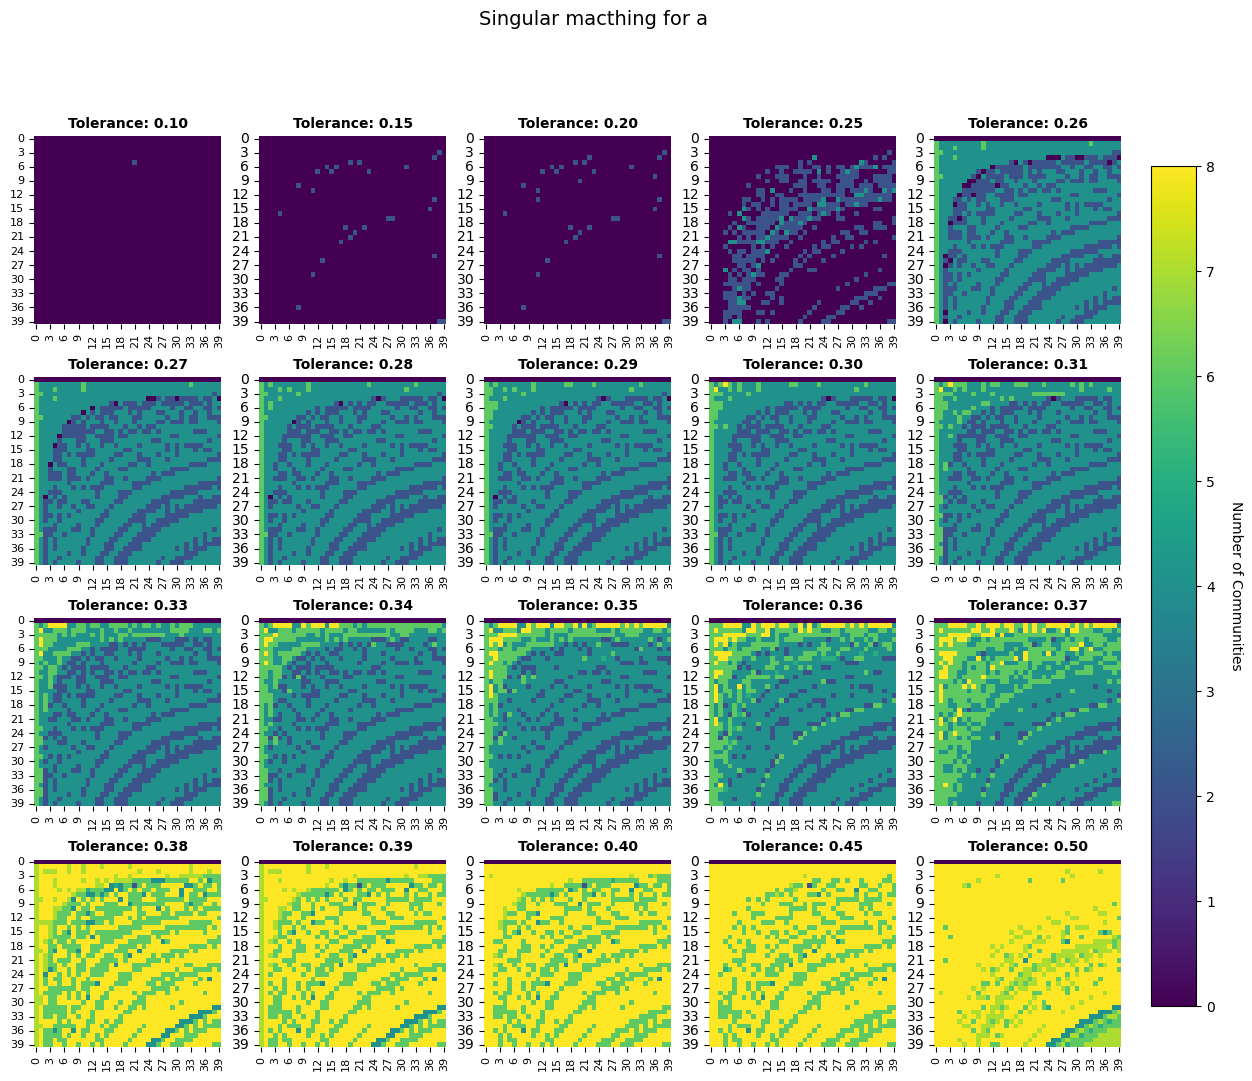

In [ ]:
gammas =  np.linspace(0, 2.5, 40)
alphas =  np.linspace(0, 5, 40)
n_kmeans = 8
vector_id_max = 2
n_tolerance = 20  
tolerance_range = np.concatenate ( ([0.10, 0.15, 0.20], np.linspace(0.25, 0.4, n_tolerance - 5), [0.45, 0.50]) )

communities = bimod_bench_plt.get_communities(A_assym + A_assym.T, A_assym, alphas, gammas, n_kmeans, vector_id_max)
heatmaps_s, heatmaps_o =  bimod_bench_plt.alpha_gamma_heatmaps(communities, tolerance_range, len(gammas) , len(alphas))

bimod_bench_plt.plot_heatmaps(alphas, gammas, n_kmeans, tolerance_range, heatmaps_s, f"Singular macthing for a ")
bimod_bench_plt.plot_heatmaps(alphas, gammas, n_kmeans, tolerance_range, heatmaps_o, f"Singular macthing for a ")


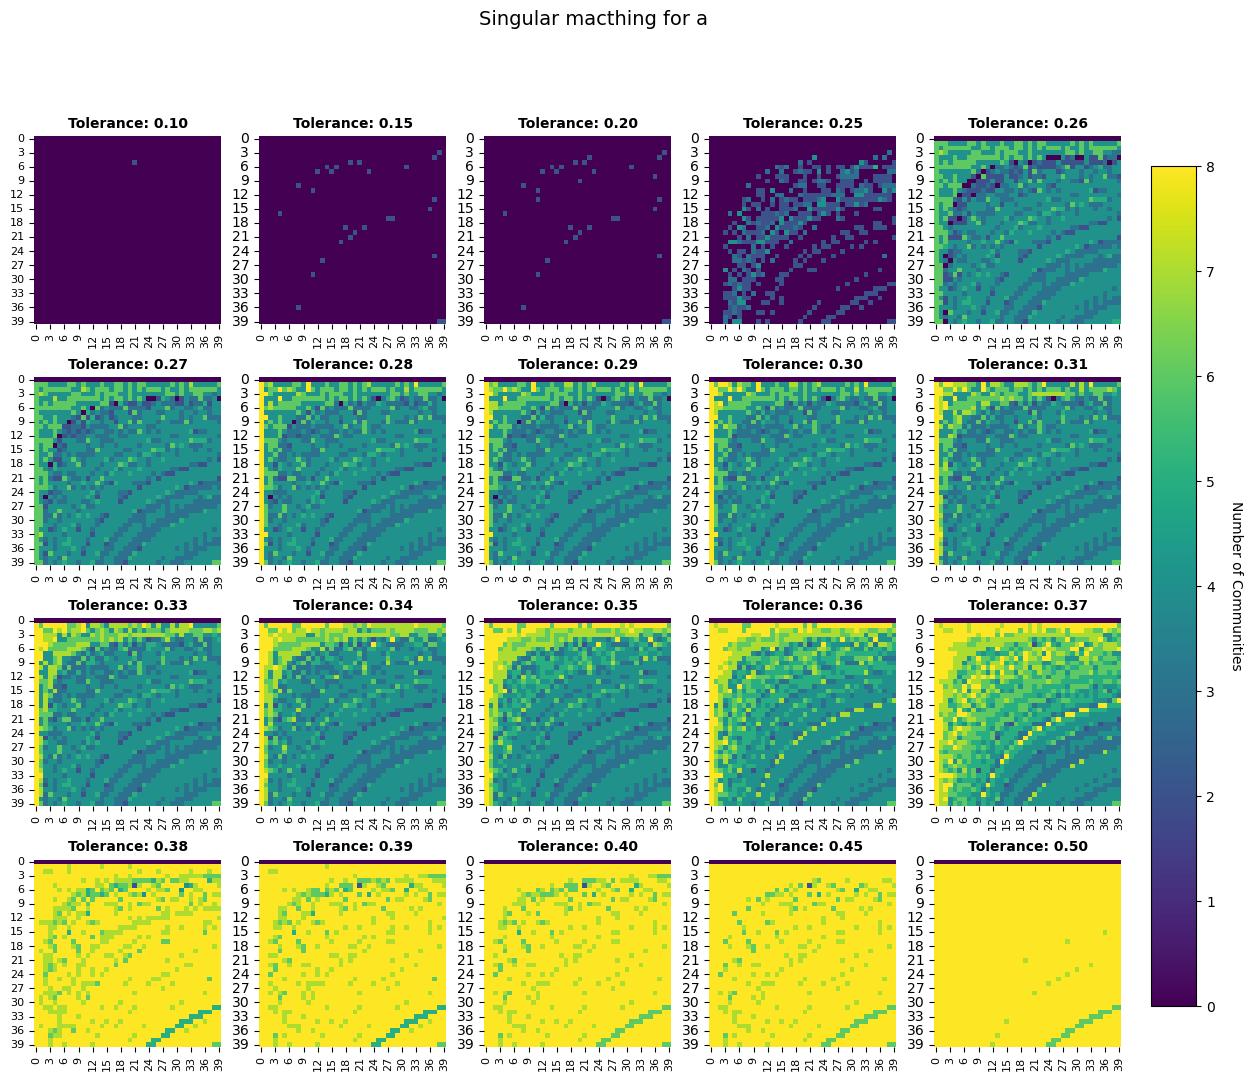

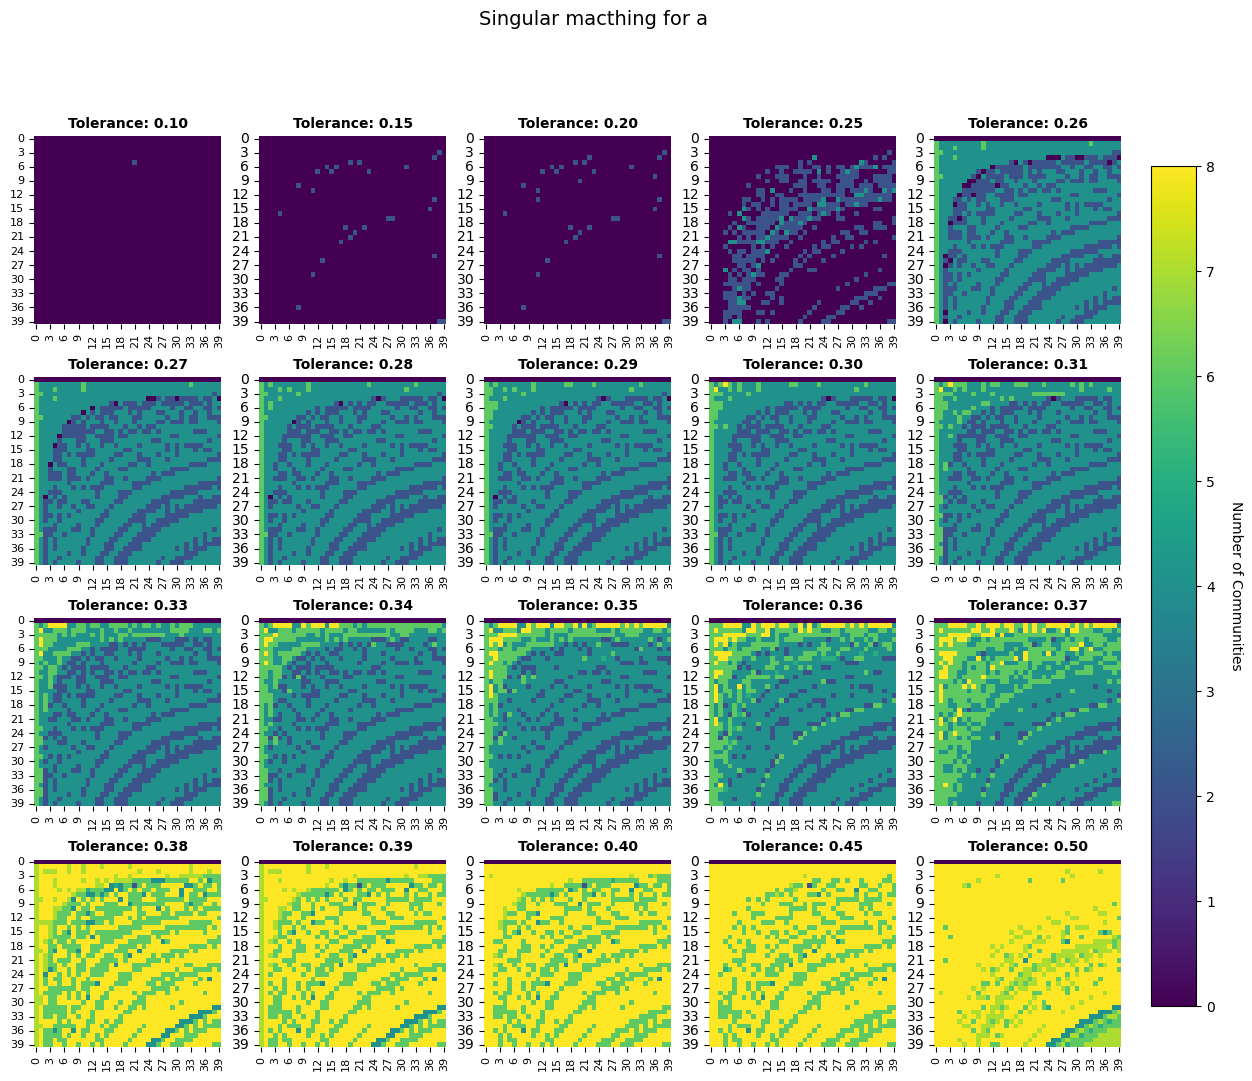

In [ ]:
gammas =  np.linspace(0, 2.5, 40)
alphas =  np.linspace(0, 5, 40)
n_kmeans = 8
vector_id_max = 2
n_tolerance = 20  
tolerance_range = np.concatenate ( ([0.10, 0.15, 0.20], np.linspace(0.25, 0.4, n_tolerance - 5), [0.45, 0.50]) )

communities = bimod_bench_plt.get_communities(A_assym + A_assym.T, A_assym, alphas, gammas, n_kmeans, vector_id_max)
heatmaps_s, heatmaps_o =  bimod_bench_plt.alpha_gamma_heatmaps(communities, tolerance_range, len(gammas) , len(alphas))

bimod_bench_plt.plot_heatmaps(alphas, gammas, n_kmeans, tolerance_range, heatmaps_s, f"Singular macthing for a ")
bimod_bench_plt.plot_heatmaps(alphas, gammas, n_kmeans, tolerance_range, heatmaps_o, f"Singular macthing for a ")


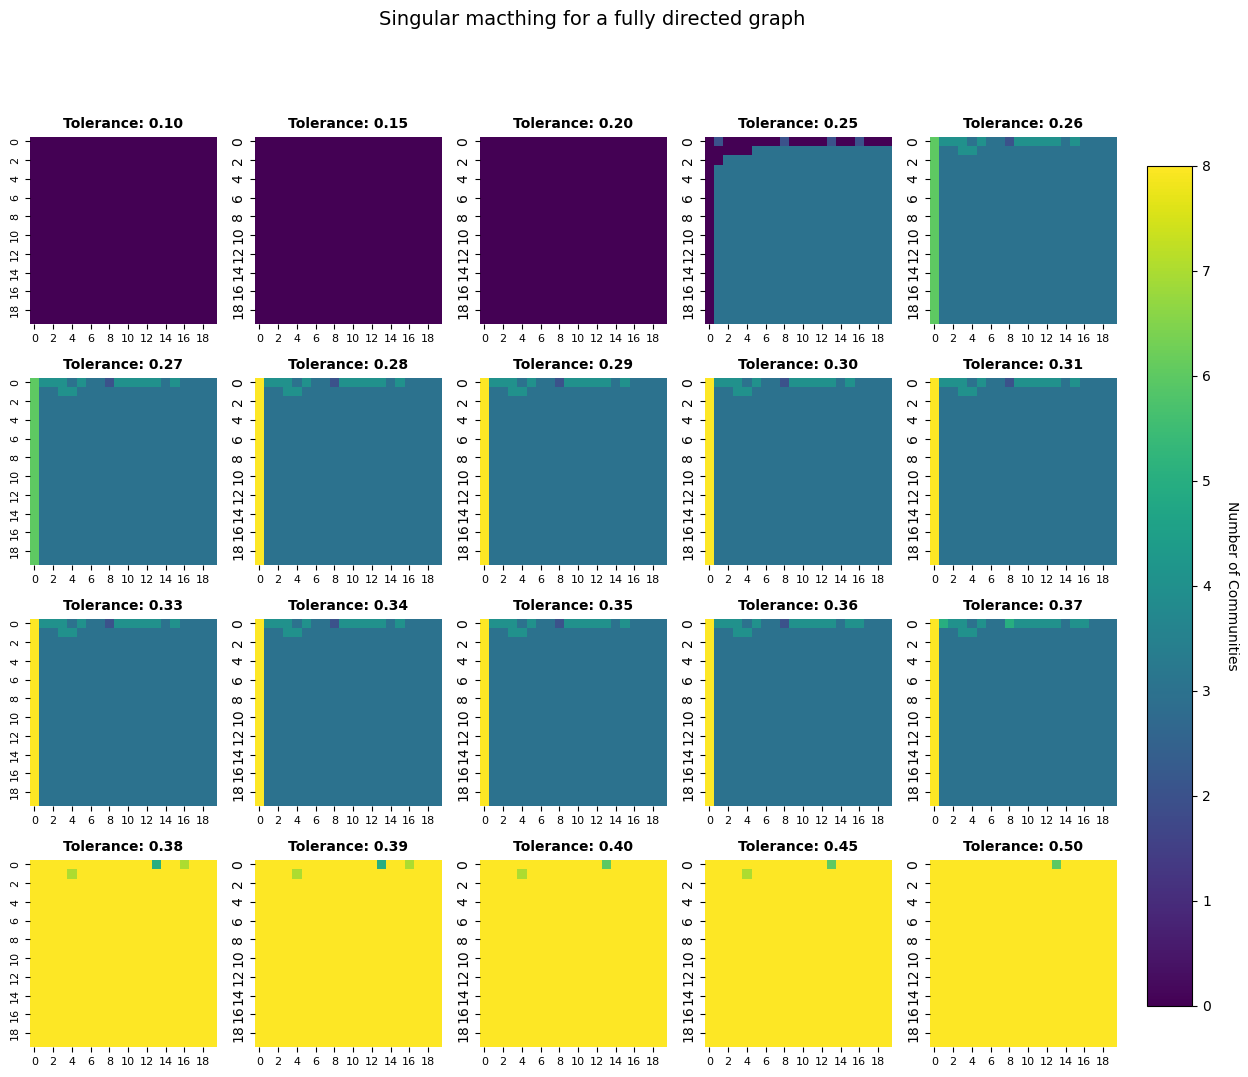

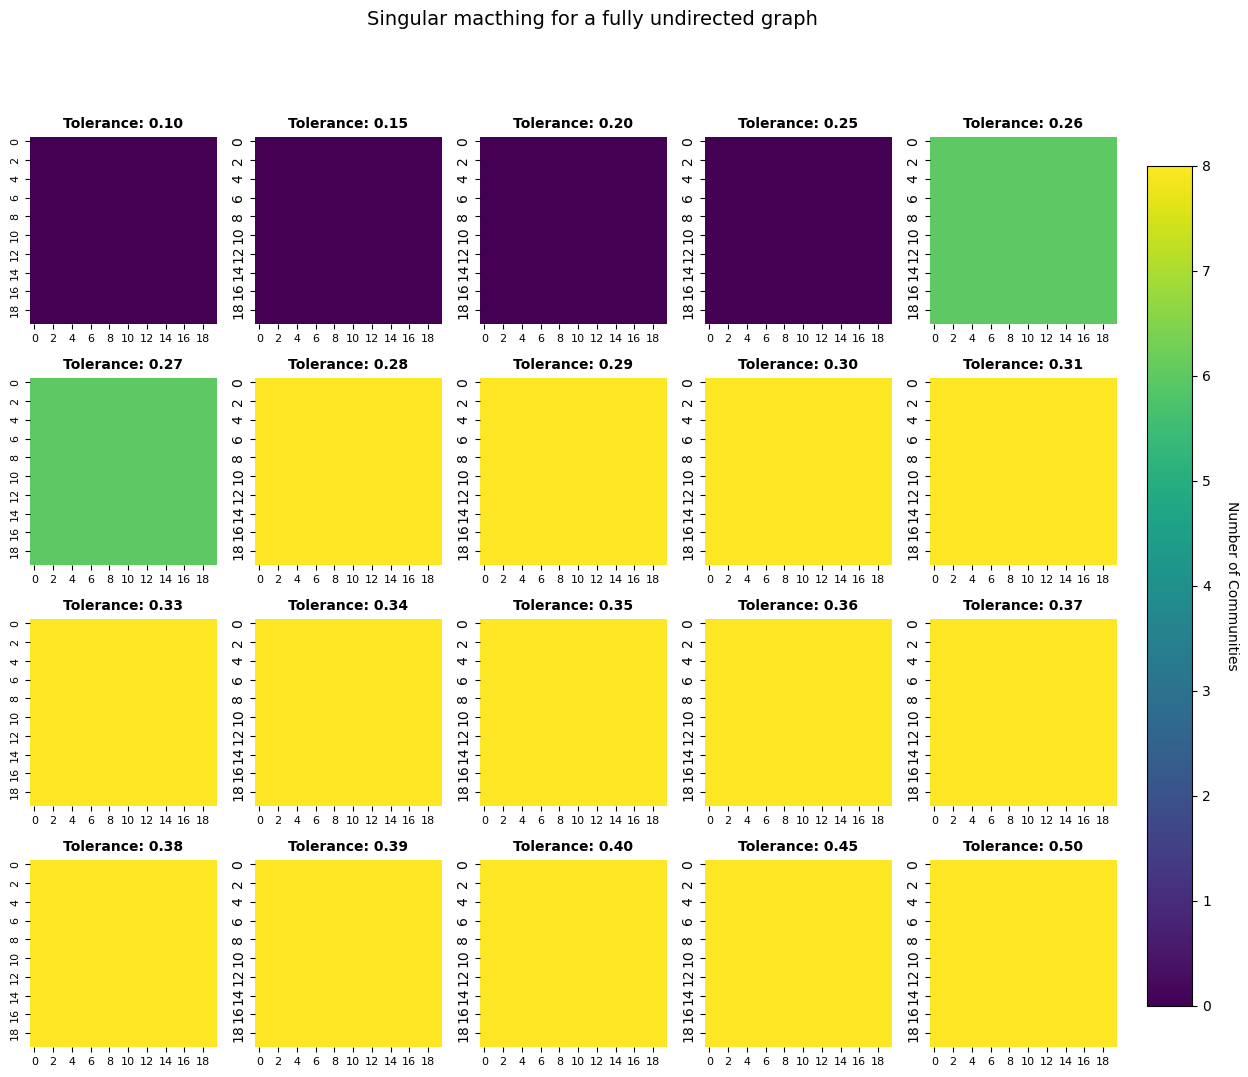

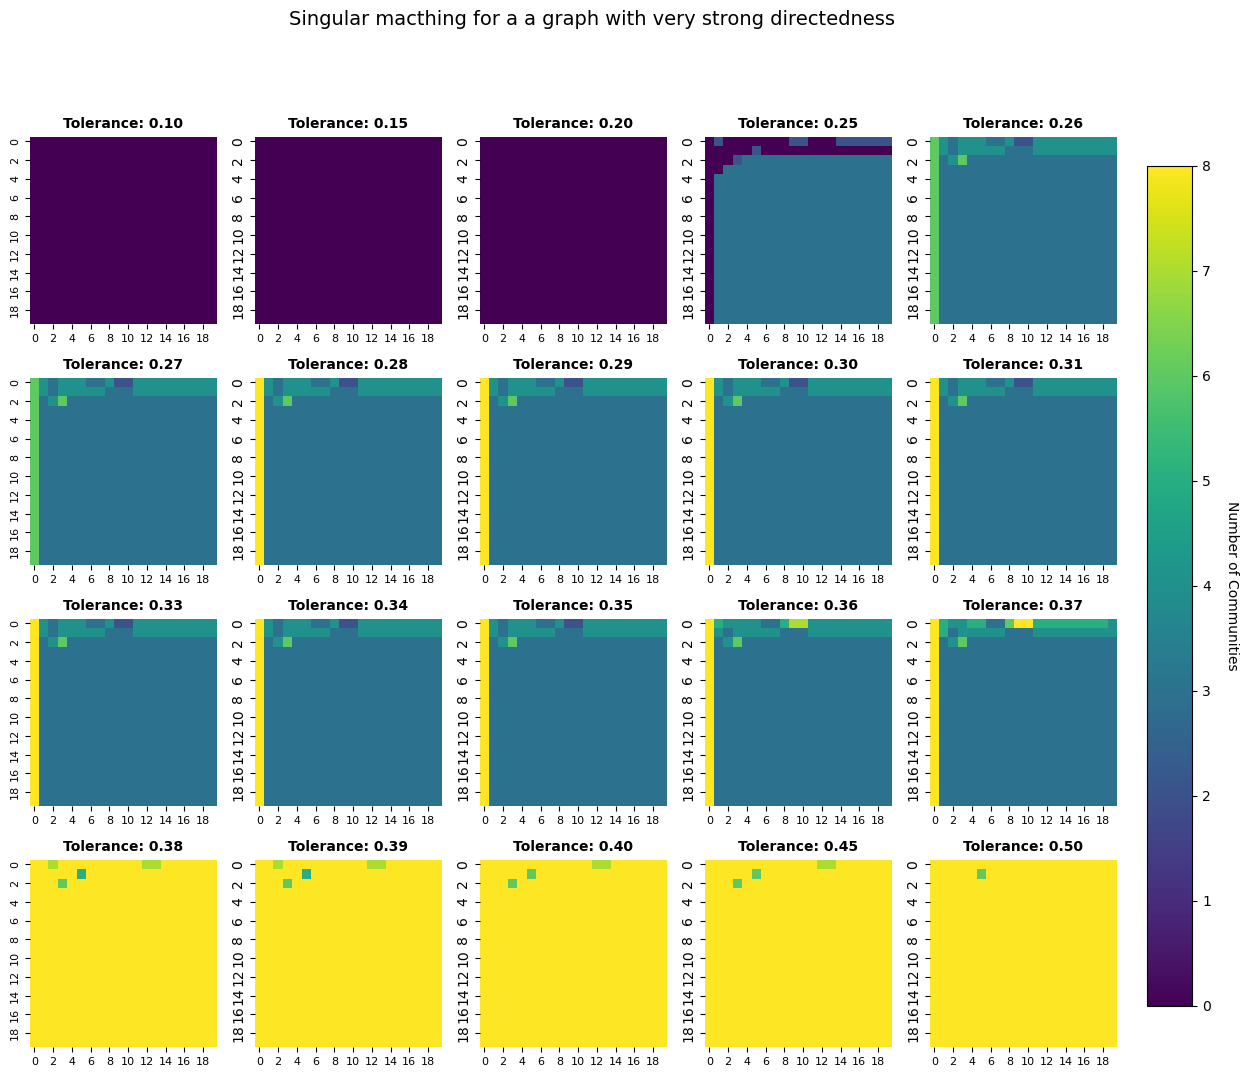

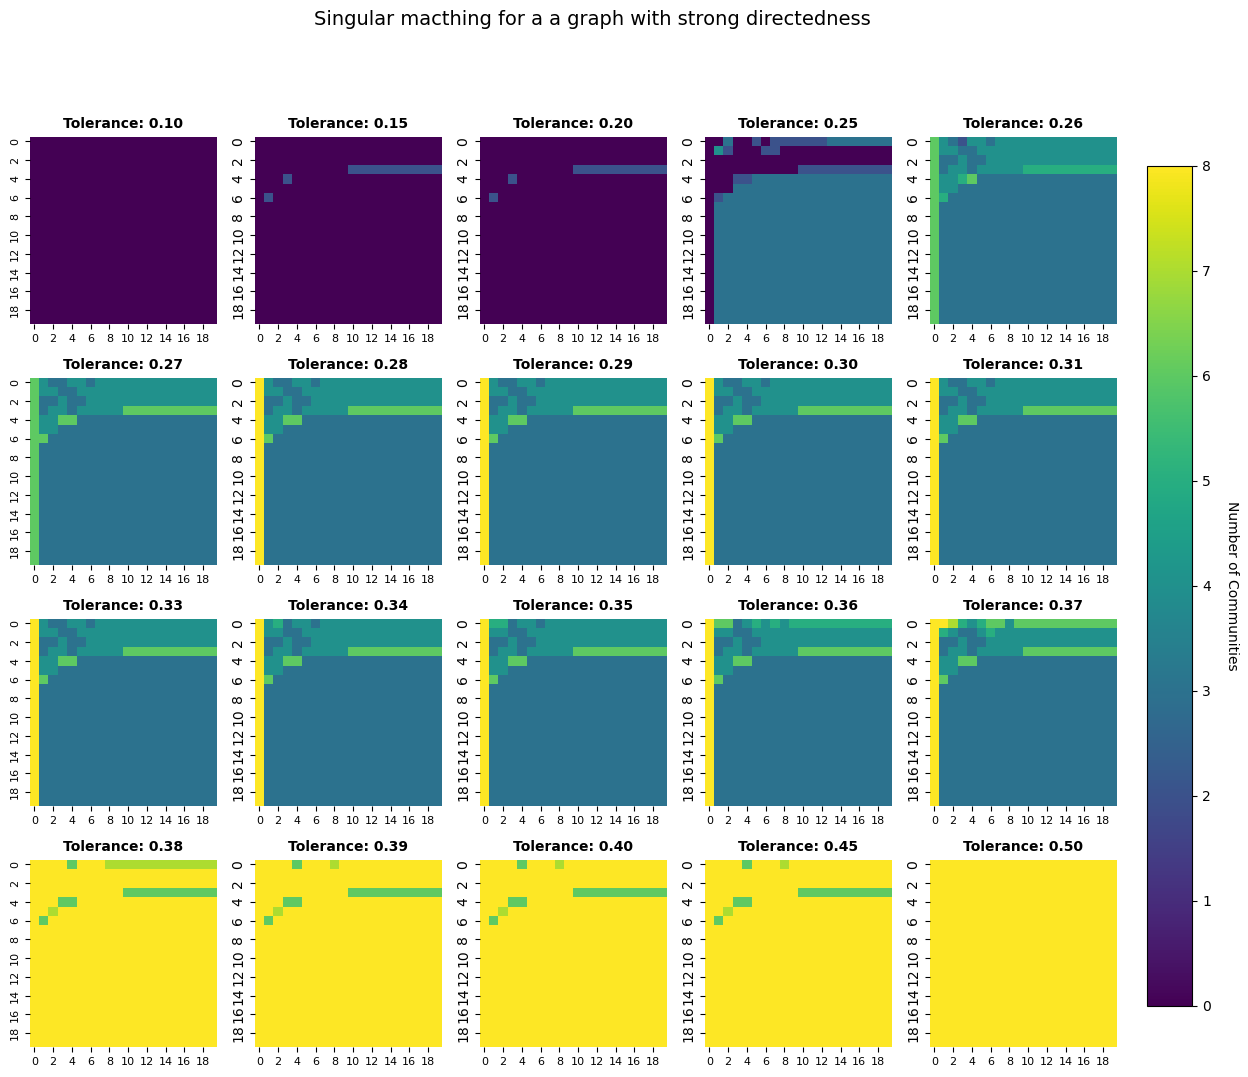

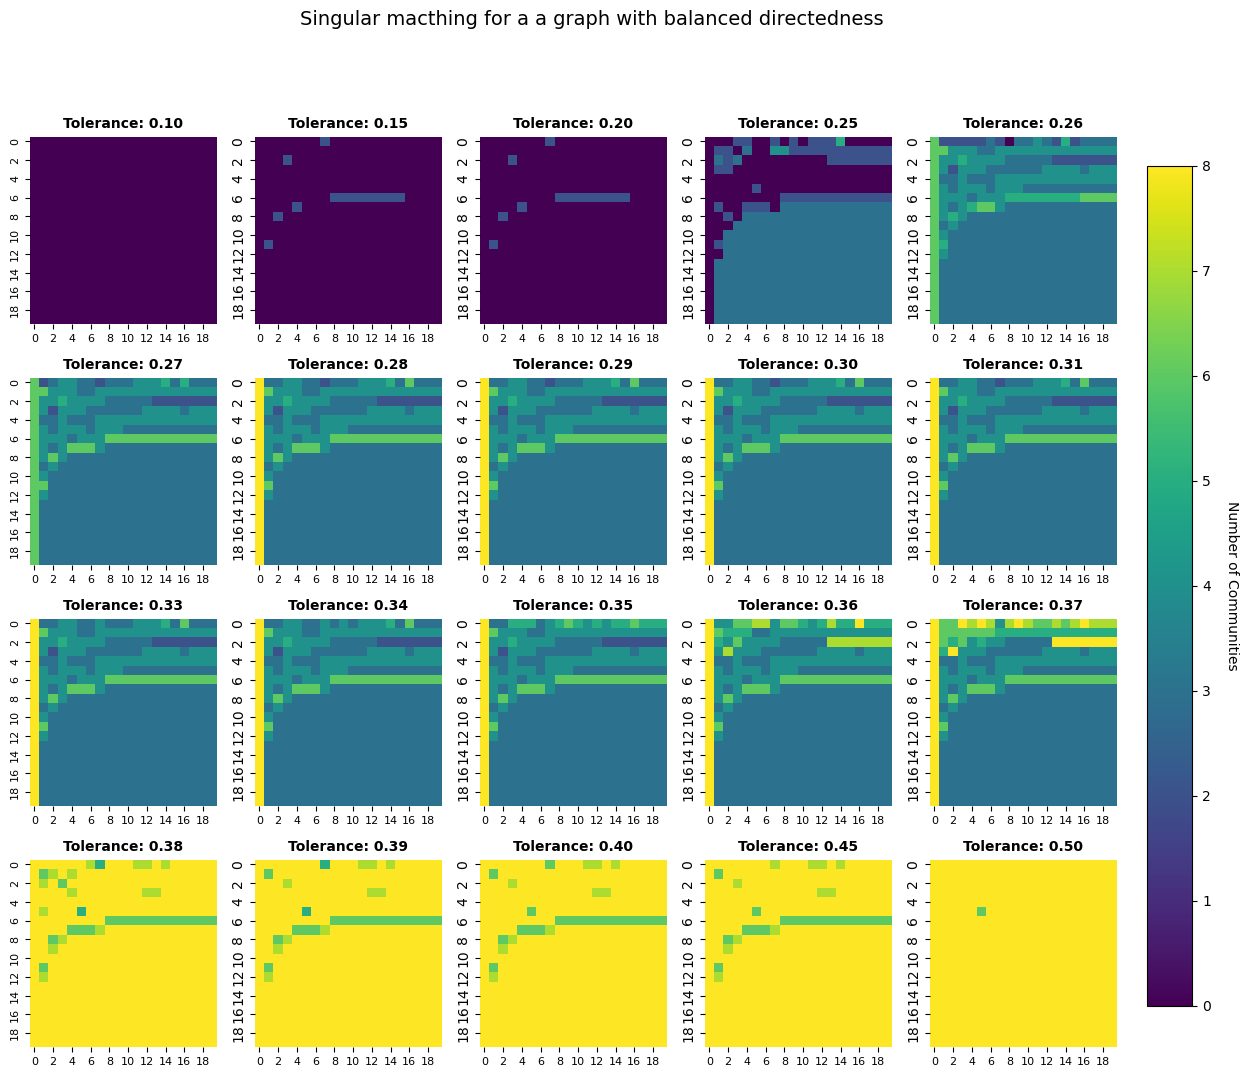

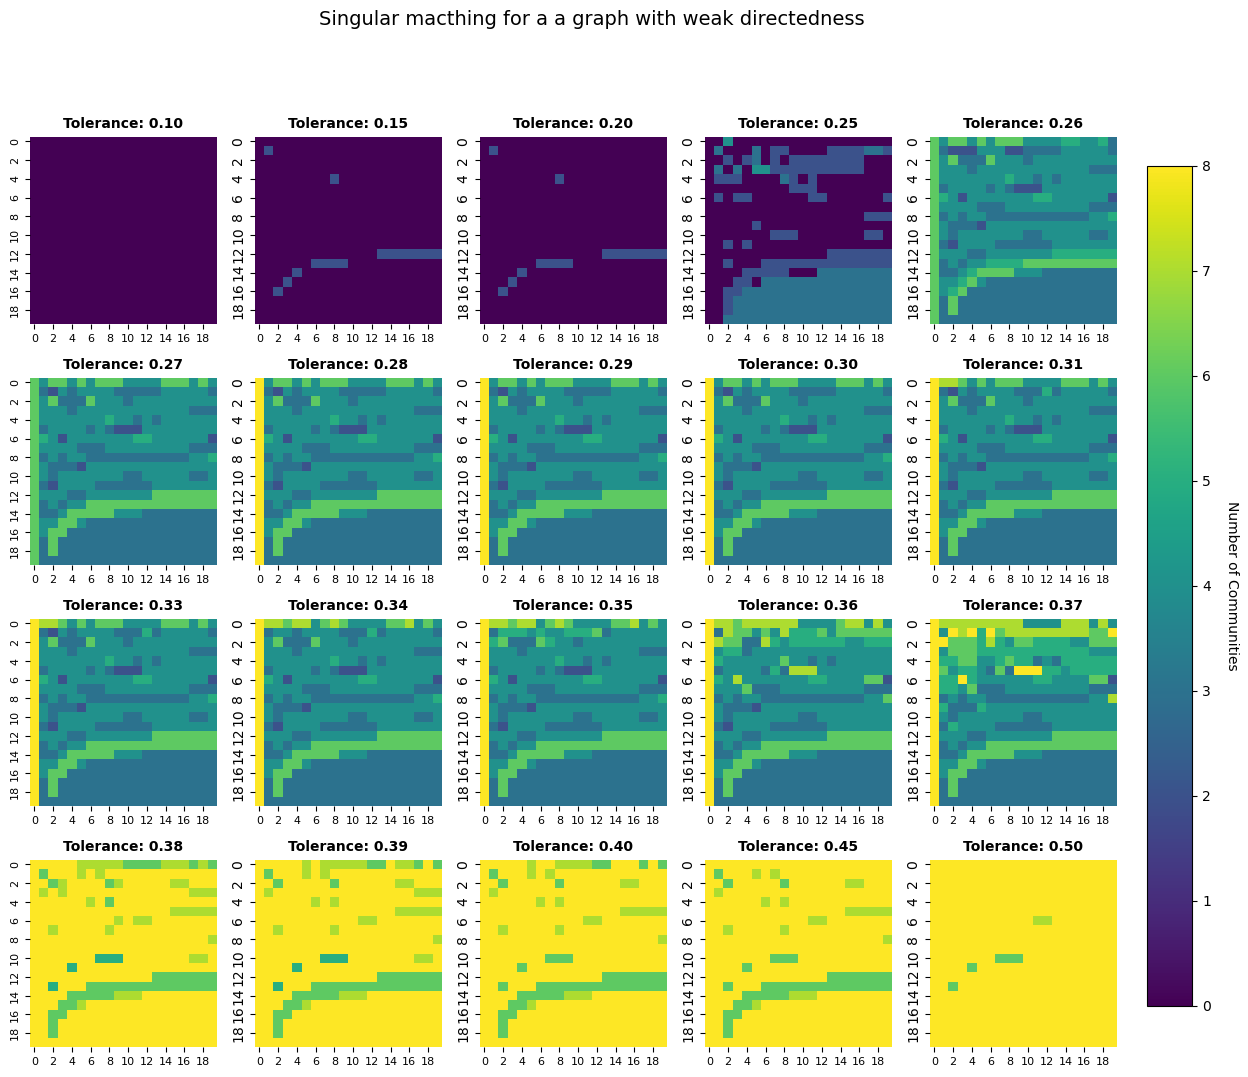

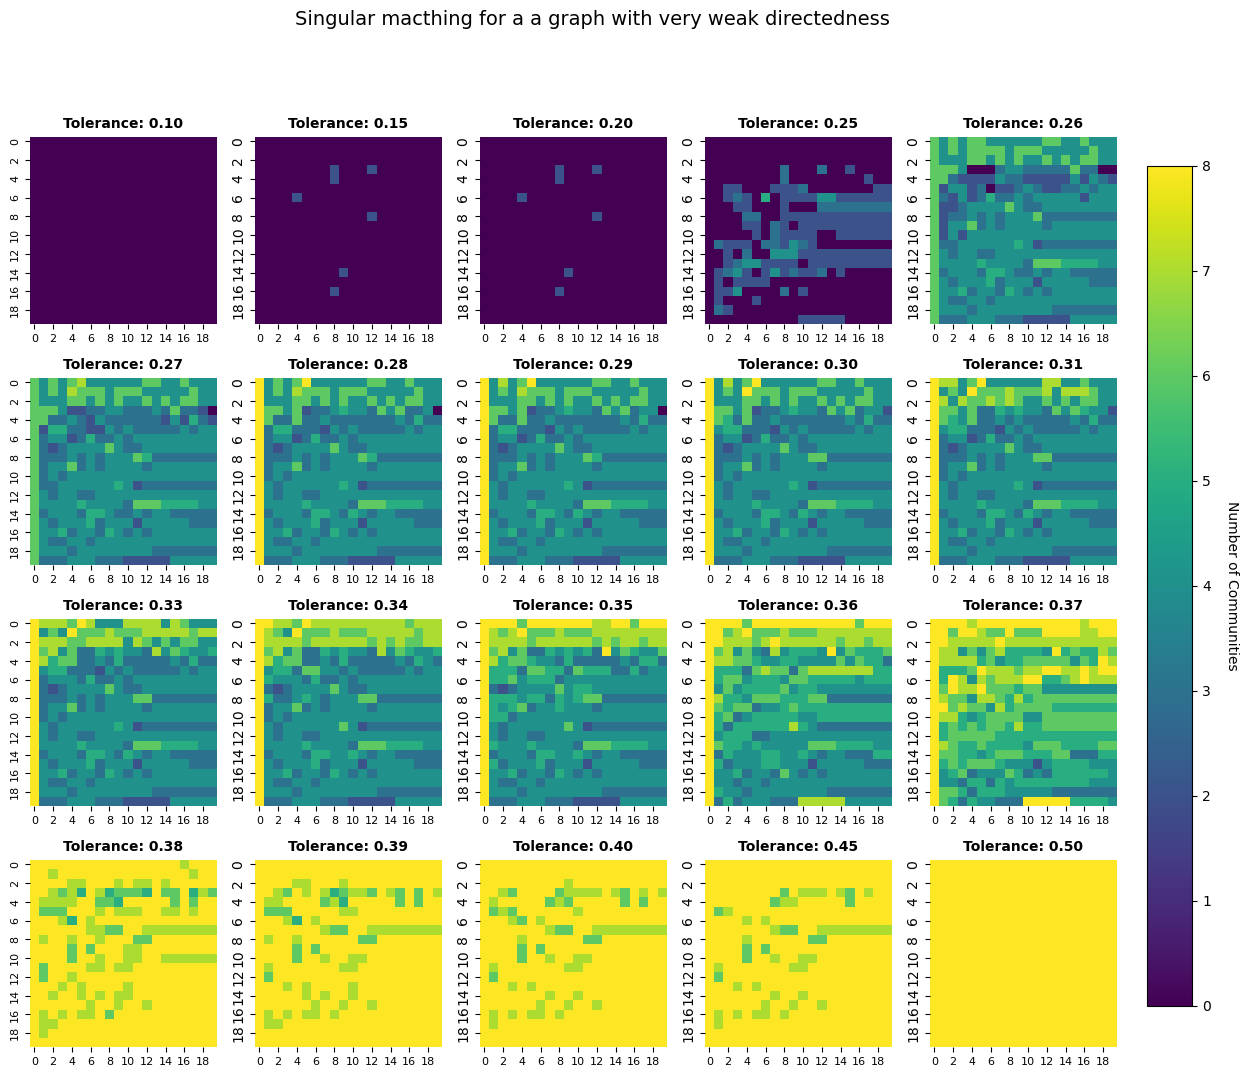

In [6]:

gammas =  np.linspace(1, 20, 20)
alphas =  np.linspace(0, 50, 20)
n_kmeans = 8
vector_id_max = 2
n_tolerance = 20  
tolerance_range = np.concatenate ( ([0.10, 0.15, 0.20], np.linspace(0.25, 0.4, n_tolerance - 5), [0.45, 0.50]) )

for g in As.keys():
    A = As[g]

    communities = bimod_bench_plt.get_communities(A + A.T, A, alphas, gammas, n_kmeans, vector_id_max)
    heatmaps_s, heatmaps_o =  bimod_bench_plt.alpha_gamma_heatmaps(communities, tolerance_range, len(gammas) , len(alphas))

    bimod_bench_plt.plot_heatmaps(alphas, gammas, n_kmeans, tolerance_range, heatmaps_s, f"Singular macthing for a {g}")
    #bimod_bench_plt.plot_heatmaps(alphas, gammas, n_kmeans, tolerance_range, heatmaps_o, f"Overall matching for a {g}")

### 2.3 Tolerance Minimization and emphasis parameter Determination

Optimize tolerance and emphasis parameters for the toy example.

In [7]:
#TODO: Determine suitable values for directedness emphasis parameter and matching tolerance 

### 2.4 Selection of Range for N, K, gamma, epsilon through Uniqueness ( meaningless for toy example)

Optimize parameter selection based on uniqueness and stability criteria.

In [8]:
#TODO: reproduce analysis with various N and K 


In [9]:
#TODO: interpret results 

## 3. C. Elegans Neural Network Analysis

Analysis of C. Elegans neural connectivity data including both chemical synapses and electrical gap junctions.

Models :
1. $(1 + \alpha)A_{chem} + A_{chem}^\top$, where $\alpha A_{chem} = \frac{A_{chem}^{\gamma}}{A_{chem}^{\gamma} + \left(A_{chem}^\top\right)^{\gamma}} $
2. $ \alpha A_{chem} + A_{EGJ}$, where $\alpha A_{chem} = \frac{A_{chem}^{\gamma}}{A_{chem}^{\gamma} + \left(A_{chem}^\top\right)^{\gamma}} $

### 3.1 Loading of Data and Setting Parameters (Chemical and Electrical Gap Junctions)

Load and preprocess C. Elegans neural connectivity data for both chemical synapses and gap junctions.

In [6]:
#TODO:  

no_sex = False
gap_junc = False

A_chem = np.genfromtxt("../data/CElegans_Chem.csv", delimiter=",")
A_egj = np.genfromtxt("../data/CElegans_Gap.csv", delimiter=",")


### 3.2 Asymmetry Variation and Relative Community Prediction

Analyze asymmetry effects in both chemical and gap junction networks.

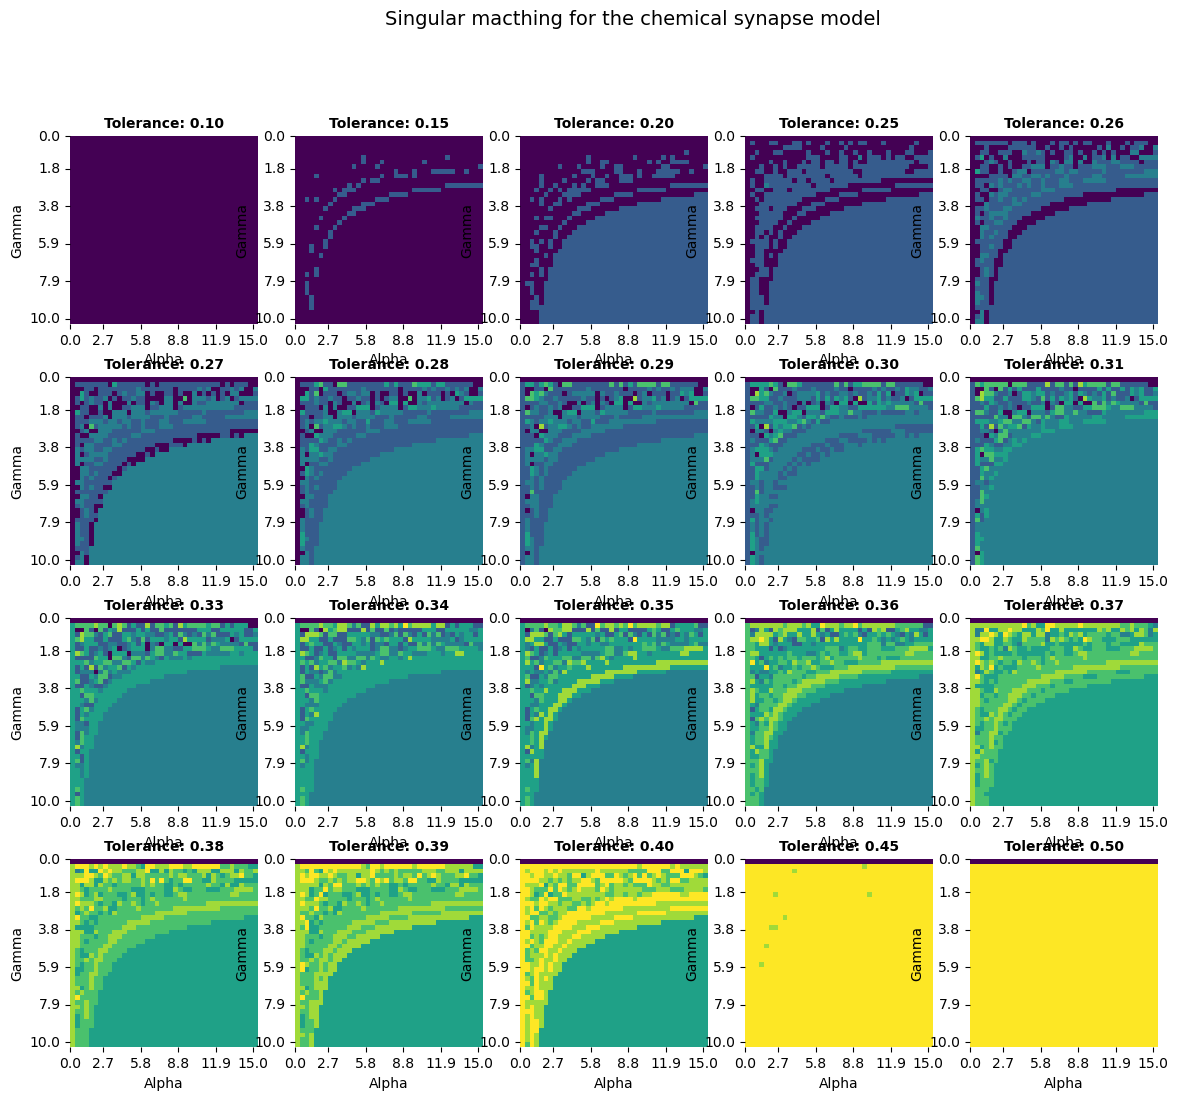

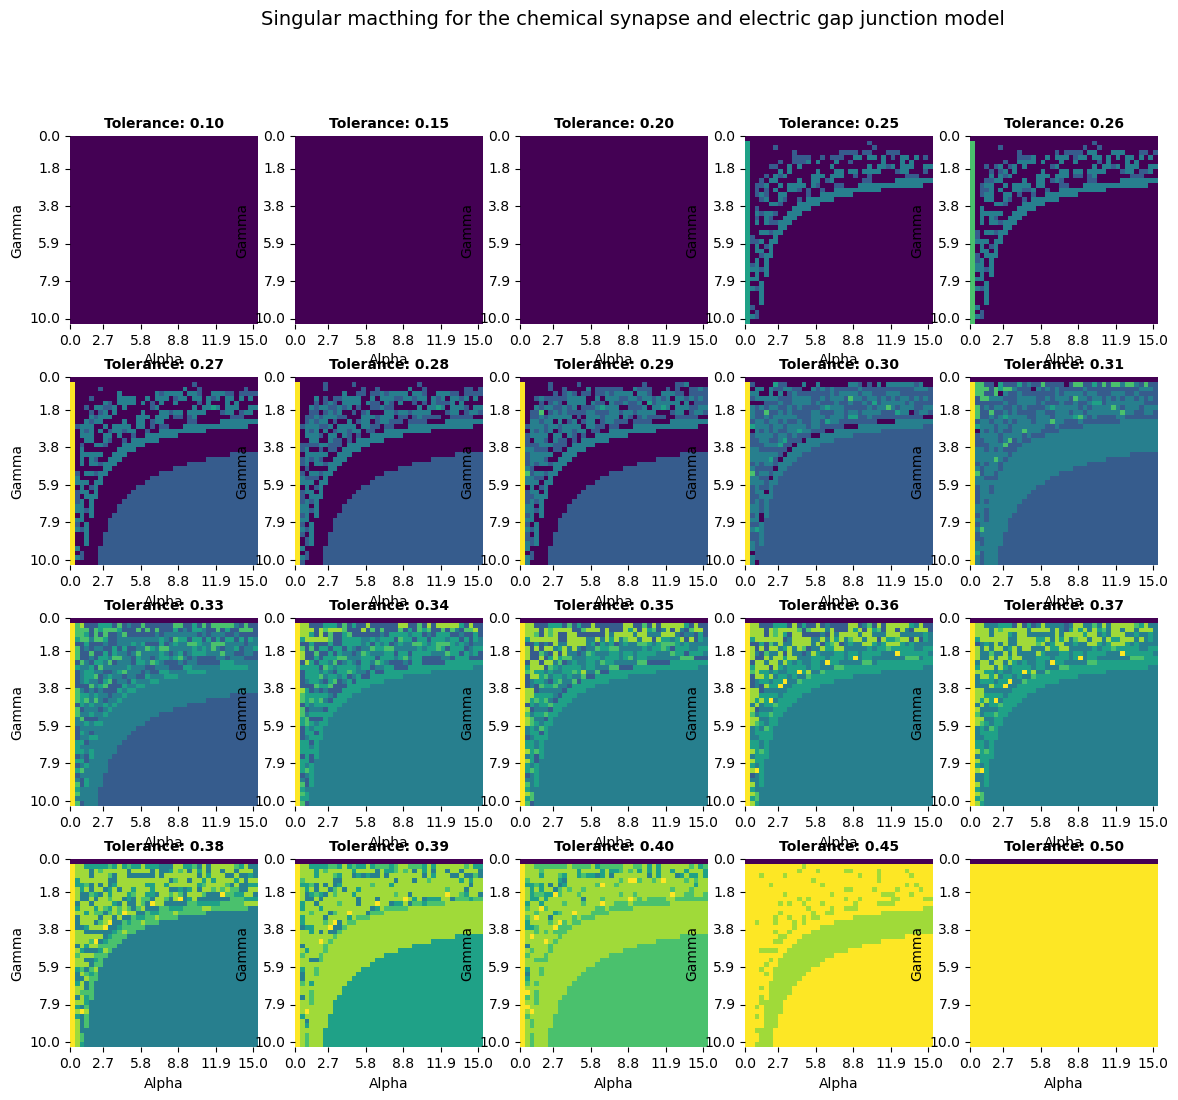

In [12]:
import warnings
warnings.filterwarnings('ignore')
gammas =  np.linspace(0, 10, 40)
alphas =  np.linspace(0, 15, 40)
n_kmeans = 7
vector_id_max = 2
n_tolerance = 20  
tolerance_range = np.concatenate ( ([0.10, 0.15, 0.20], np.linspace(0.25, 0.4, n_tolerance - 5), [0.45, 0.50]) )

# model 1
communities = bimod_bench_plt.get_communities(A_chem + A_chem.T, A_chem, alphas, gammas, n_kmeans, vector_id_max)
heatmaps_s, heatmaps_o =  bimod_bench_plt.alpha_gamma_heatmaps(communities, tolerance_range, len(gammas) , len(alphas))

bimod_bench_plt.plot_heatmaps(alphas, gammas, n_kmeans, tolerance_range, heatmaps_s, f"Singular macthing for the chemical synapse model")
#bimod_bench_plt.plot_heatmaps(alphas, gammas, n_kmeans, tolerance_range, heatmaps_o, f"Overall matching for the chemical synapse model")
# model 2
communities = bimod_bench_plt.get_communities( A_egj, A_chem, alphas, gammas, n_kmeans, vector_id_max)
heatmaps_s, heatmaps_o =  bimod_bench_plt.alpha_gamma_heatmaps(communities, tolerance_range, len(gammas) , len(alphas))

bimod_bench_plt.plot_heatmaps(alphas, gammas, n_kmeans, tolerance_range, heatmaps_s, f"Singular macthing for the chemical synapse and electric gap junction model")
#bimod_bench_plt.plot_heatmaps(alphas, gammas, k, tolerance_range, heatmaps_o, f"Overall matching for the chemical synapse and electric gap junction model")


In [14]:
alphas =  np.linspace(0, 10, 40)
gammas =  np.linspace(0, 5, 40)

bimod_bench_plt.show_repartition(communities, 0.38, alphas, gammas, n_kmeans)

Counts of surviving communities at tolerance 0.38
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [318 959 724 710  42 355  33   0]
 [ 32  22  30  50  41  36  21   0]
 [ 51  62  75  56  61  76  29   0]
 [326 244 314 283 283 290 216   0]
 [ 47  47  47  47  47  47  47   0]]


Counts of surviving communities at tolerance 0.38
[[  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0 757 757 757   0   0 757   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0 843 843 843   0 843 843 843   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]]


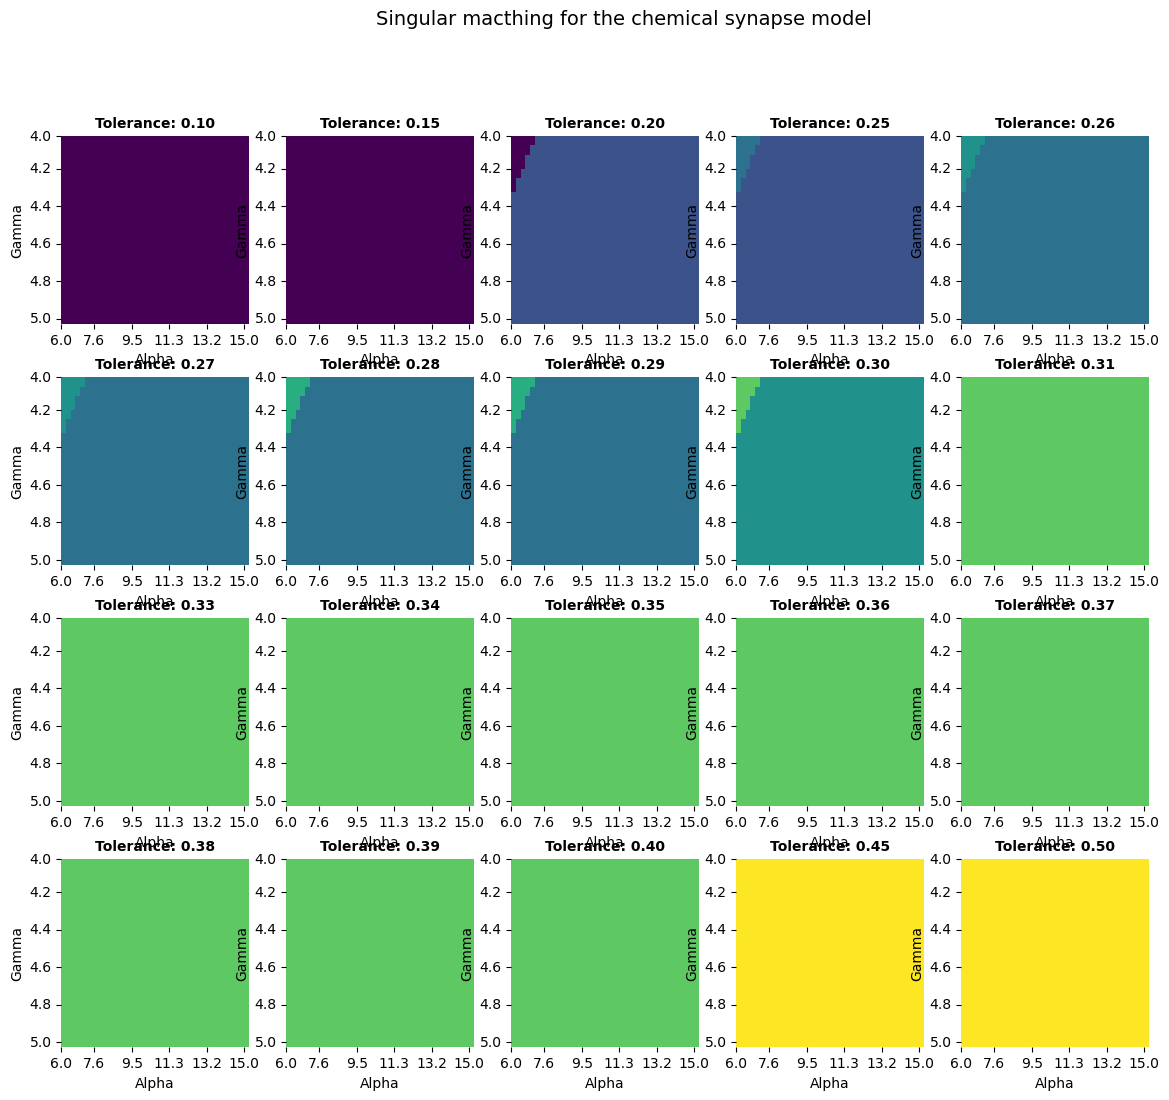

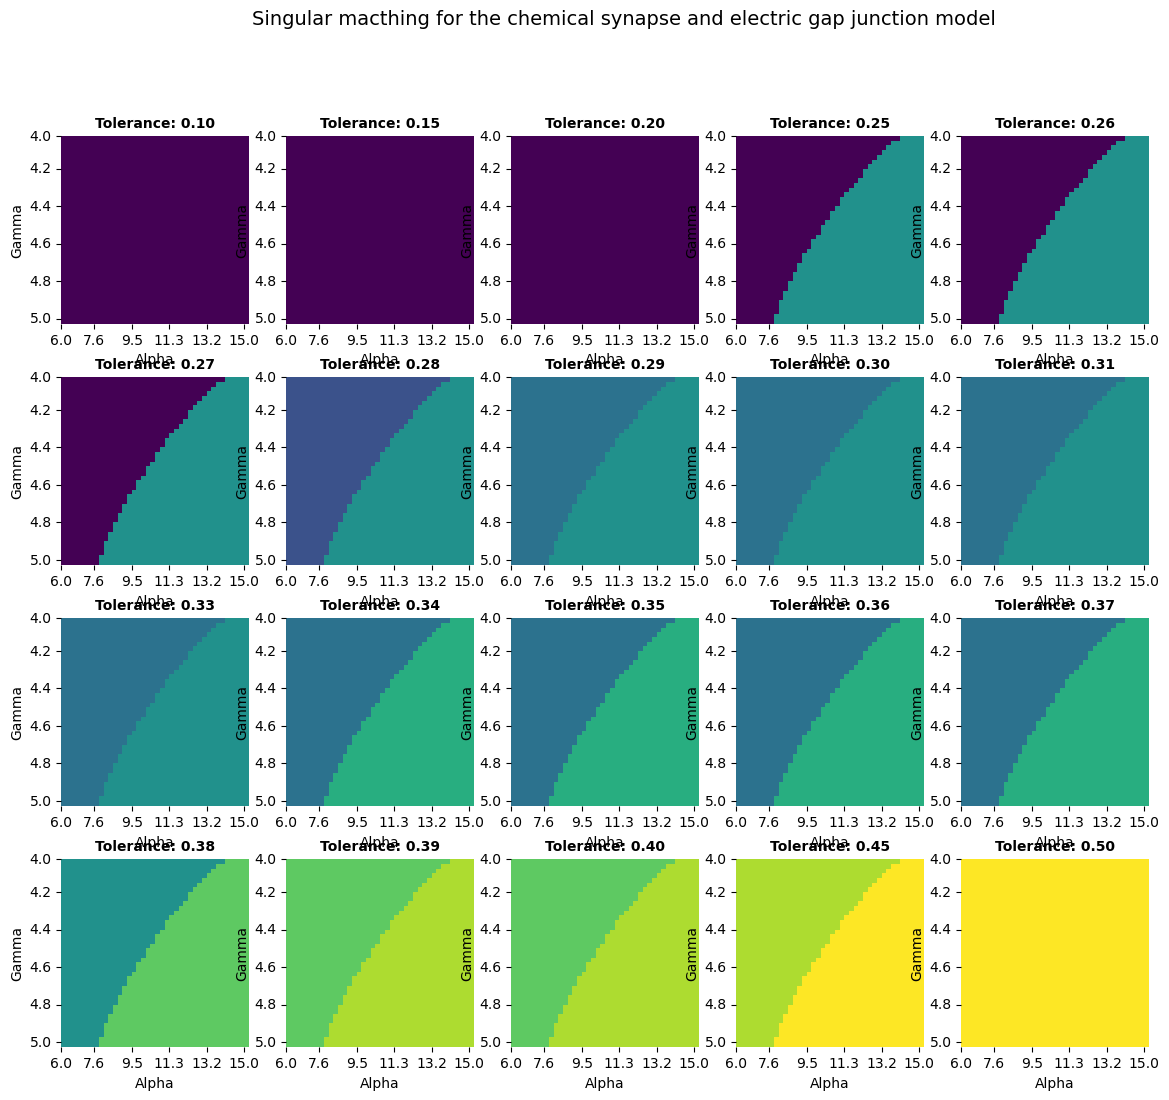

In [8]:
import warnings
warnings.filterwarnings('ignore')
gammas =  np.linspace(4, 5, 40)
alphas =  np.linspace(6, 15, 40)
n_kmeans = 8
vector_id_max = 2
n_tolerance = 20  
tolerance_range = np.concatenate ( ([0.10, 0.15, 0.20], np.linspace(0.25, 0.4, n_tolerance - 5), [0.45, 0.50]) )

# model 1
communities = bimod_bench_plt.get_communities(A_chem + A_chem.T, A_chem, alphas, gammas, n_kmeans, vector_id_max)
heatmaps_s, heatmaps_o =  bimod_bench_plt.alpha_gamma_heatmaps(communities, tolerance_range, len(gammas) , len(alphas))

bimod_bench_plt.plot_heatmaps(alphas, gammas, n_kmeans, tolerance_range, heatmaps_s, f"Singular macthing for the chemical synapse model")
#bimod_bench_plt.plot_heatmaps(alphas, gammas, n_kmeans, tolerance_range, heatmaps_o, f"Overall matching for the chemical synapse model")
# model 2
communities = bimod_bench_plt.get_communities( A_egj, A_chem, alphas, gammas, n_kmeans, vector_id_max)
heatmaps_s, heatmaps_o =  bimod_bench_plt.alpha_gamma_heatmaps(communities, tolerance_range, len(gammas) , len(alphas))

bimod_bench_plt.plot_heatmaps(alphas, gammas, n_kmeans, tolerance_range, heatmaps_s, f"Singular macthing for the chemical synapse and electric gap junction model")
#bimod_bench_plt.plot_heatmaps(alphas, gammas, k, tolerance_range, heatmaps_o, f"Overall matching for the chemical synapse and electric gap junction model")
bimod_bench_plt.show_repartition(communities, 0.38, alphas, gammas, n_kmeans)

Counts of surviving communities at tolerance 0.38
[[  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   1   0   2   8   3  10   0]
 [ 14  13   8   6   8  21  16   7   0]
 [198 251 534 585 234 320 428 506   0]
 [ 64 182 244 205 204 118 145 153   0]
 [ 93 176 198 181 133 137 168 174   0]
 [280 222 269 261 191 238 226 273   0]
 [  0   0   0   0   0   0   0   0   0]]


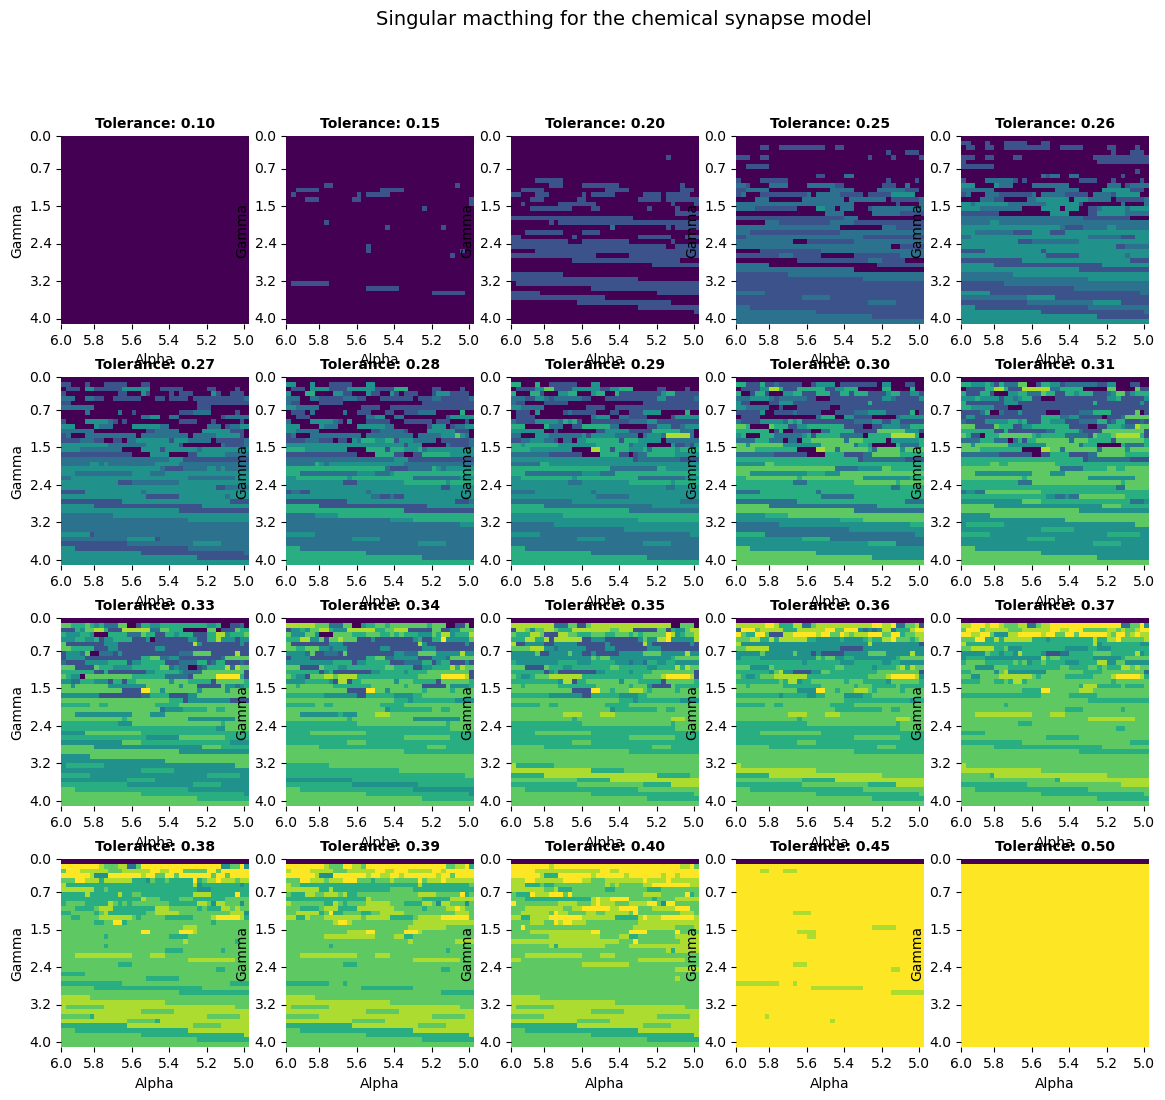

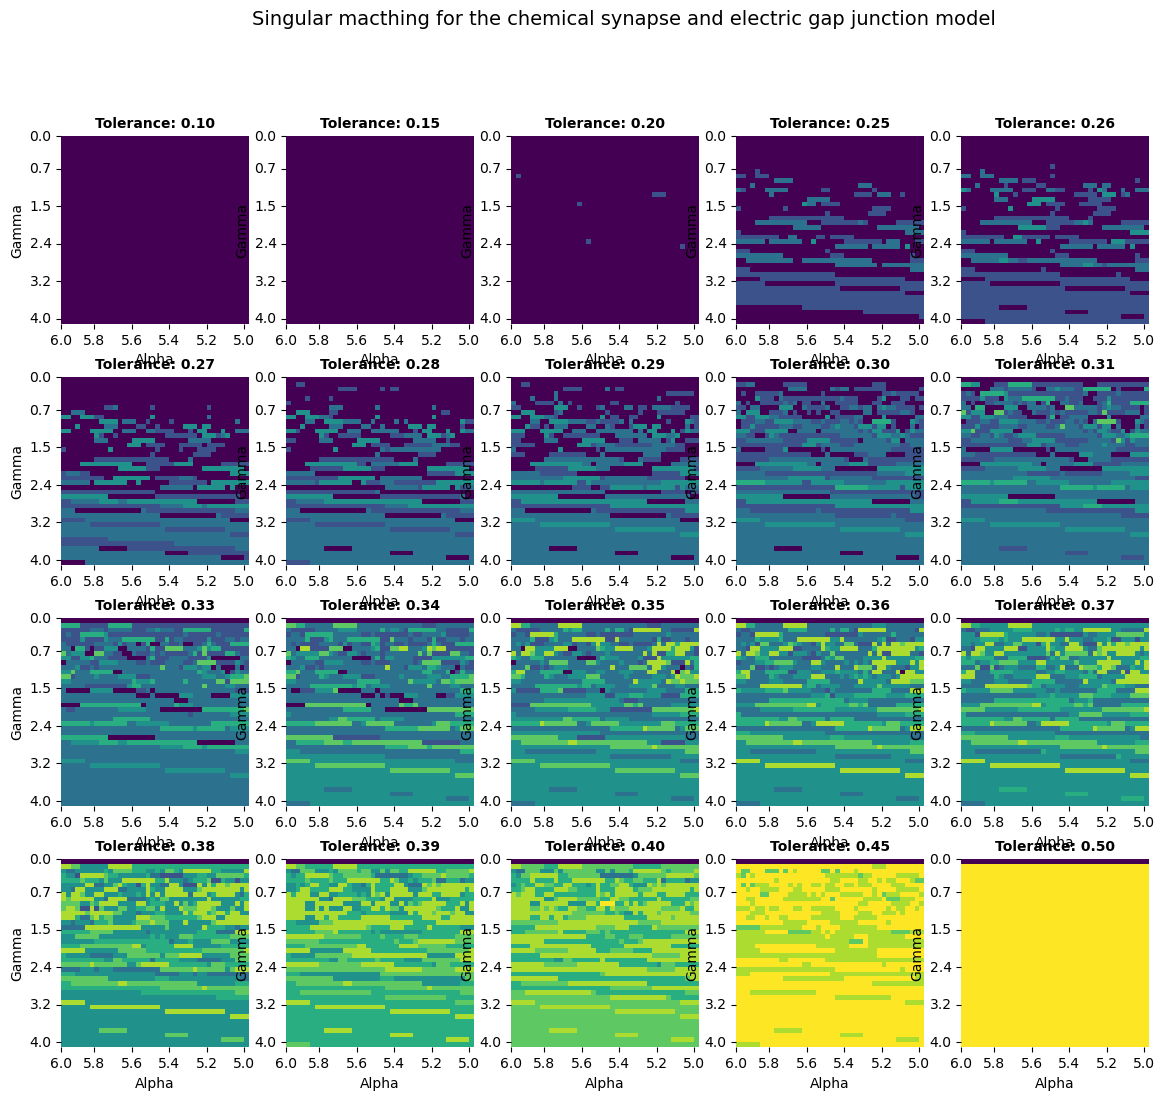

In [15]:
import warnings
warnings.filterwarnings('ignore')
gammas =  np.linspace(0, 4, 40)
alphas =  np.linspace(6, 5, 40)
n_kmeans = 8
vector_id_max = 2
n_tolerance = 20  
tolerance_range = np.concatenate ( ([0.10, 0.15, 0.20], np.linspace(0.25, 0.4, n_tolerance - 5), [0.45, 0.50]) )

# model 1
communities = bimod_bench_plt.get_communities(A_chem + A_chem.T, A_chem, alphas, gammas, n_kmeans, vector_id_max)
heatmaps_s, heatmaps_o =  bimod_bench_plt.alpha_gamma_heatmaps(communities, tolerance_range, len(gammas) , len(alphas))

bimod_bench_plt.plot_heatmaps(alphas, gammas, n_kmeans, tolerance_range, heatmaps_s, f"Singular macthing for the chemical synapse model")
#bimod_bench_plt.plot_heatmaps(alphas, gammas, n_kmeans, tolerance_range, heatmaps_o, f"Overall matching for the chemical synapse model")
# model 2
communities = bimod_bench_plt.get_communities( A_egj, A_chem, alphas, gammas, n_kmeans, vector_id_max)
heatmaps_s, heatmaps_o =  bimod_bench_plt.alpha_gamma_heatmaps(communities, tolerance_range, len(gammas) , len(alphas))

bimod_bench_plt.plot_heatmaps(alphas, gammas, n_kmeans, tolerance_range, heatmaps_s, f"Singular macthing for the chemical synapse and electric gap junction model")
#bimod_bench_plt.plot_heatmaps(alphas, gammas, k, tolerance_range, heatmaps_o, f"Overall matching for the chemical synapse and electric gap junction model")
bimod_bench_plt.show_repartition(communities, 0.38, alphas, gammas, n_kmeans)

[array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 4., 4., 4.],
       [0., 0., 0., ..., 4., 4., 4.],
       [0., 0., 0., ..., 4., 4., 4.],
       ...,
       [0., 0., 0., ..., 4., 4., 4.],
       [0., 0., 0., ..., 4., 4., 4.],
       [0., 0., 0., ..., 4., 4., 4.]]), array([[0., 0., 0., ..., 4., 4.

### 3.3 Tolerance Minimization and Uniqueness Determination

Optimize tolerance parameters for both chemical and gap junction networks.

### 3.4 Selection of Range for N, K, gamma, epsilon through Uniqueness

Optimize parameters for both chemical and gap junction networks based on uniqueness criteria.

## 4. Brain Network Analysis

Brain connectivity network analysis - To Be Determined (TBD).



## 5. Results Visualization and Summary

Comprehensive visualization and comparison of results across all datasets.